# Goals

   
### Questions
- what should be the percentage of the flare area on the solar disk to overcome the threshold of detection (most easy goal)
- How can we mesearue the flare spectrum to be present (integrating it weighted over the line/ fliters)
- what behaviours of the flare can be detected from the spacially integrated spectrum
- Making investigations of several types (ribbon/flare/...) time evolution of spectrum
- does sunspots have anything to do with them.
- ...


# formaat maken met H alpha

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi as un
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection

import sys
# sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi as un
print('sys.path:', sys.path)

sys.path: ['e:\\solar flares\\data\\2017-09-06', 'c:\\Users\\Gebruiker\\Anaconda3\\python311.zip', 'c:\\Users\\Gebruiker\\Anaconda3\\DLLs', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib', 'c:\\Users\\Gebruiker\\Anaconda3', '', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\Pythonwin']


Boundary
Blue=Outside, yellow=Inside


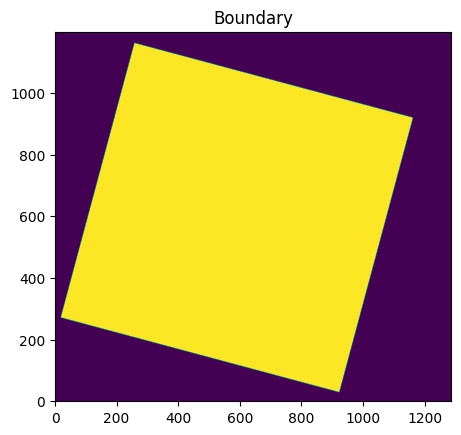

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')
COCOPLOT at  t=09:21:50 UT (frame number 70 )


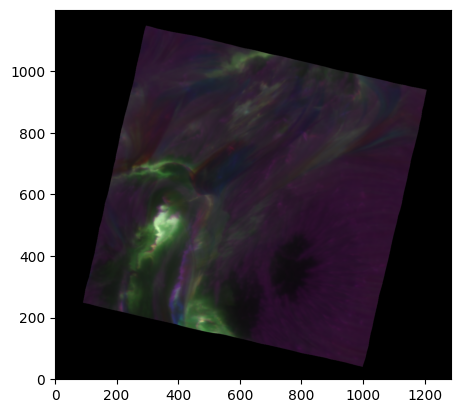

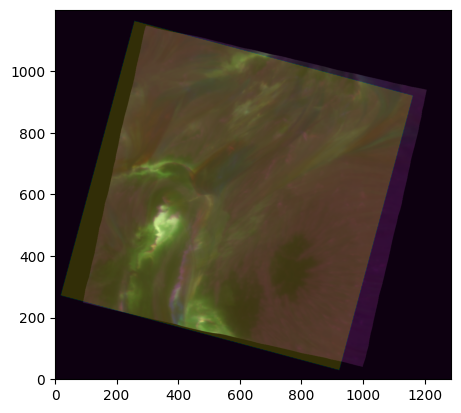

(1200, 1287, 3) (1200, 1287) 
HOW DOES THOSE DO NOT OVERLAP????


In [2]:
reload(un)
Ha = un.SST_data('nb_6563_2017-09-06T09_04_20_09_04_20=0-200_mixed_corrected_im.fits',
                   'spectfile6563_93.idlsave','use_solarnet', name_of_line='Ha17_9u', thresh=[1e-15,2e-5])
Ha.update_filters([[10,1.25], [6,1], [2,1.25]])
Ha.ccp_frame(70)

Ha.ccp_frame(70,Show=False)
plt.imshow(Ha.current_ccp, origin='lower')

plt.imshow(Ha.boundary, origin='lower', alpha=0.2)
plt.show()
print(np.shape(Ha.current_ccp),np.shape(Ha.boundary[::-1,:]), "\nHOW DOES THOSE DO NOT OVERLAP????")

there are 201 frames
COCOPLOT at  t=09:51:46 UT (frame number 190 )


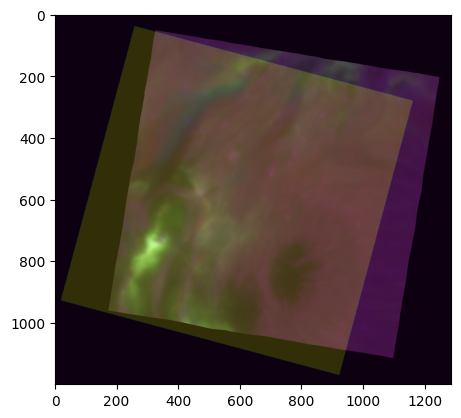

COCOPLOT at  t=09:52:01 UT (frame number 191 )


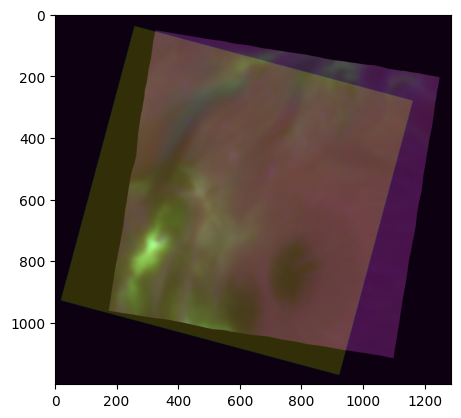

COCOPLOT at  t=09:52:16 UT (frame number 192 )


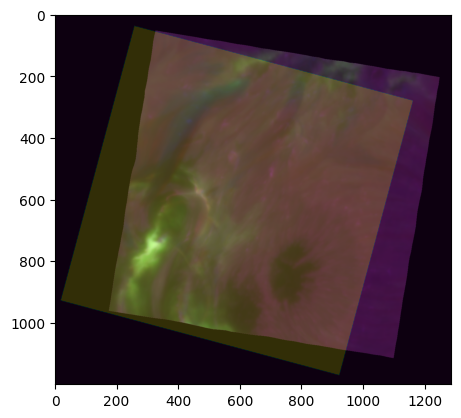

COCOPLOT at  t=09:52:31 UT (frame number 193 )


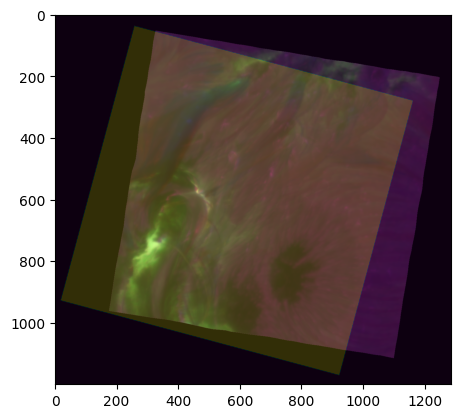

COCOPLOT at  t=09:52:46 UT (frame number 194 )


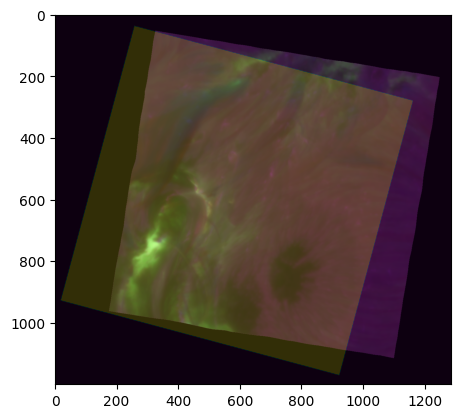

COCOPLOT at  t=09:53:01 UT (frame number 195 )


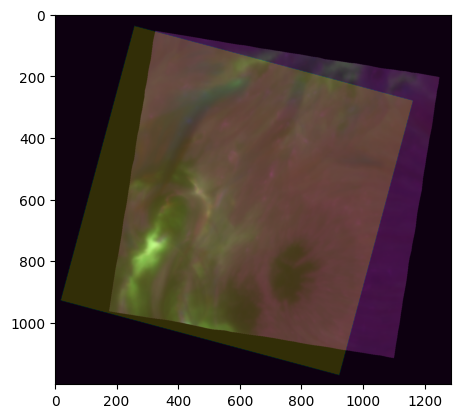

COCOPLOT at  t=09:53:16 UT (frame number 196 )


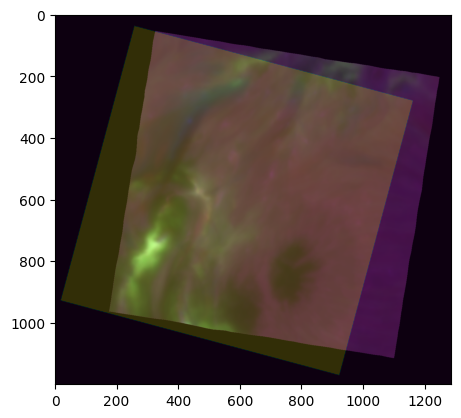

COCOPLOT at  t=09:53:31 UT (frame number 197 )


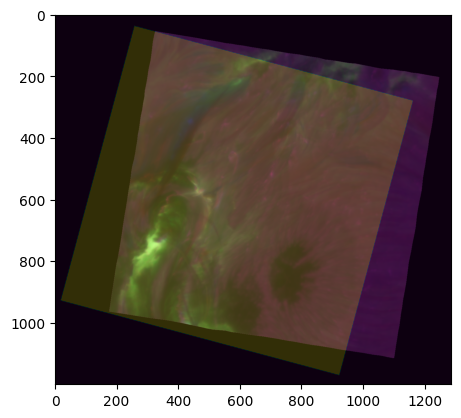

COCOPLOT at  t=09:53:46 UT (frame number 198 )


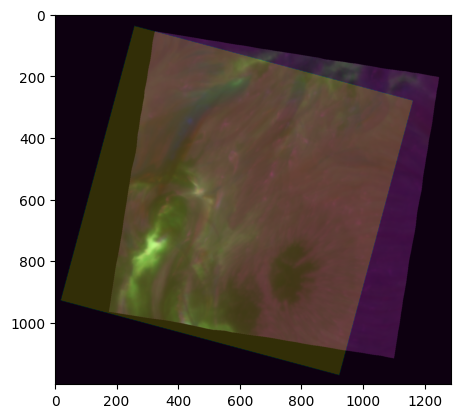

COCOPLOT at  t=09:54:01 UT (frame number 199 )


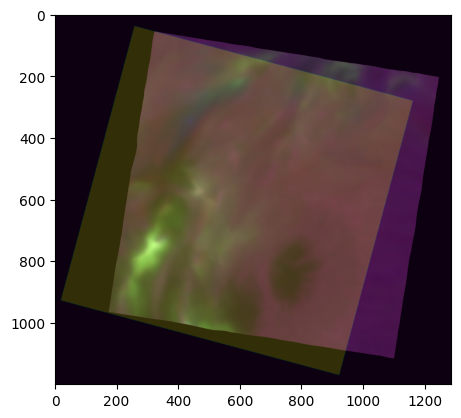

COCOPLOT at  t=09:54:16 UT (frame number 200 )


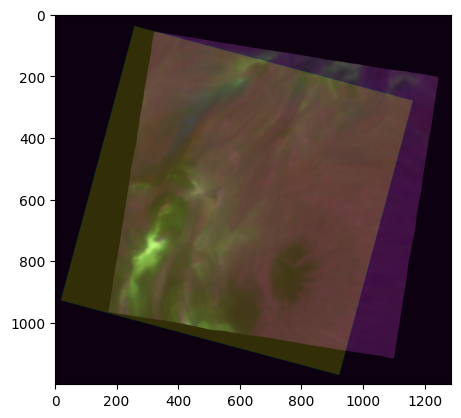

In [13]:
# Many COCOPLOTS
r = Ha._number_of_frames
print(f"there are {r} frames")
for i in range(190,r,1):
    tstr = Ha.time_of_frame(i)
    print("COCOPLOT at ", tstr, "(frame number", i,")")
    Ha.ccp_frame(i,Show=False)
    plt.imshow(Ha.current_ccp[::-1,:])

    plt.imshow(Ha.boundary[::-1,:], alpha=0.2)
    plt.show()

In [3]:
Ha._time[1], Ha._time[0], Ha._time[2], Ha._time[-1], Ha._wavel, str(Ha._time[0]).split('.')[0][2:]#(str(Ha._time[0]).split('.')[0]).split["'"]

('09:04:38.114340',
 '09:04:23.151830',
 '09:04:53.076760',
 '09:54:16.612720',
 array([6561.49999988, 6562.        , 6562.19999999, 6562.39999998,
        6562.69999999, 6562.84999999, 6563.        , 6563.15000001,
        6563.30000001, 6563.60000002, 6563.80000001, 6564.        ,
        6564.50000012], dtype='>f8'),
 ':04:23')

In [4]:
Ha.calculate__FOV_spect_over_time()

In [5]:
secs = un.get_TIME(Ha)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} for this line!")

the mean cadence is 14.964999999999998 for this line!


In [6]:
65.170194-50.208205, (95.121560 - 50.0208) /3

(14.961988999999996, 15.033586666666666)

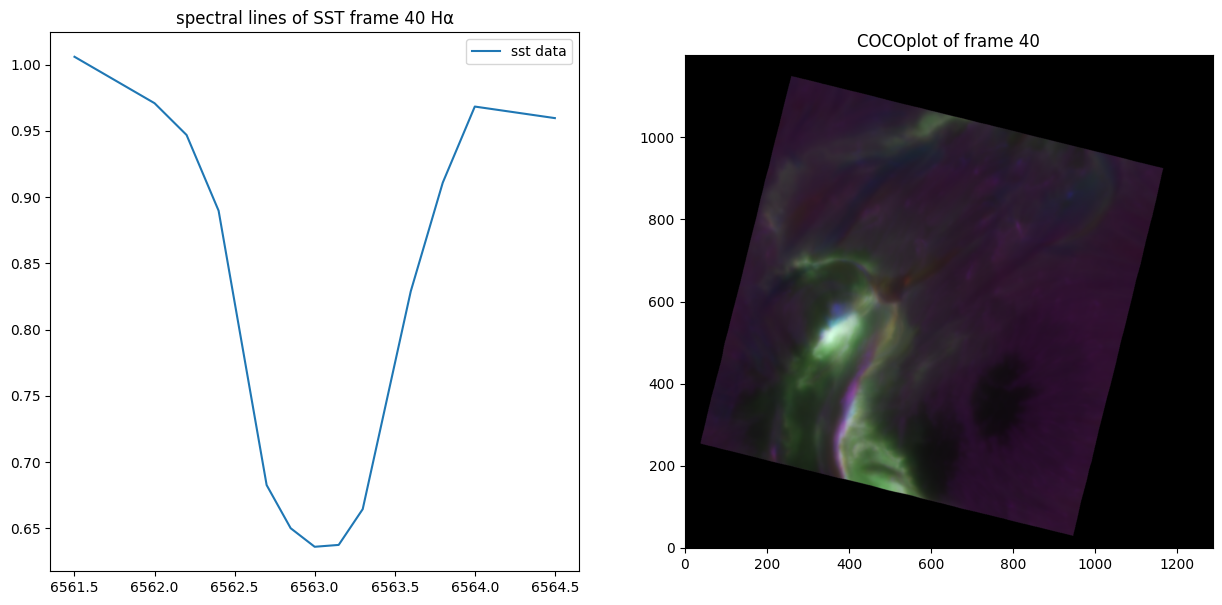

In [7]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
Ha.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(Ha.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

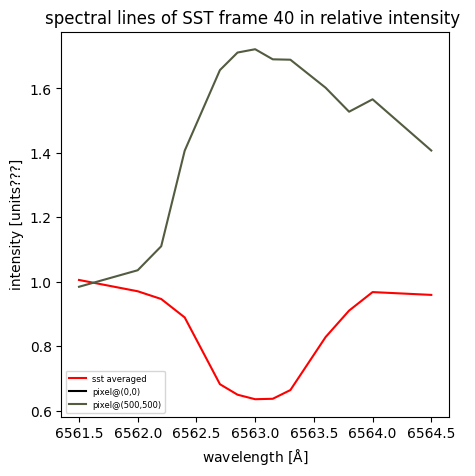

In [8]:
Ha.current_ccp[0:30:10,0:60:20,:]
Ha.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

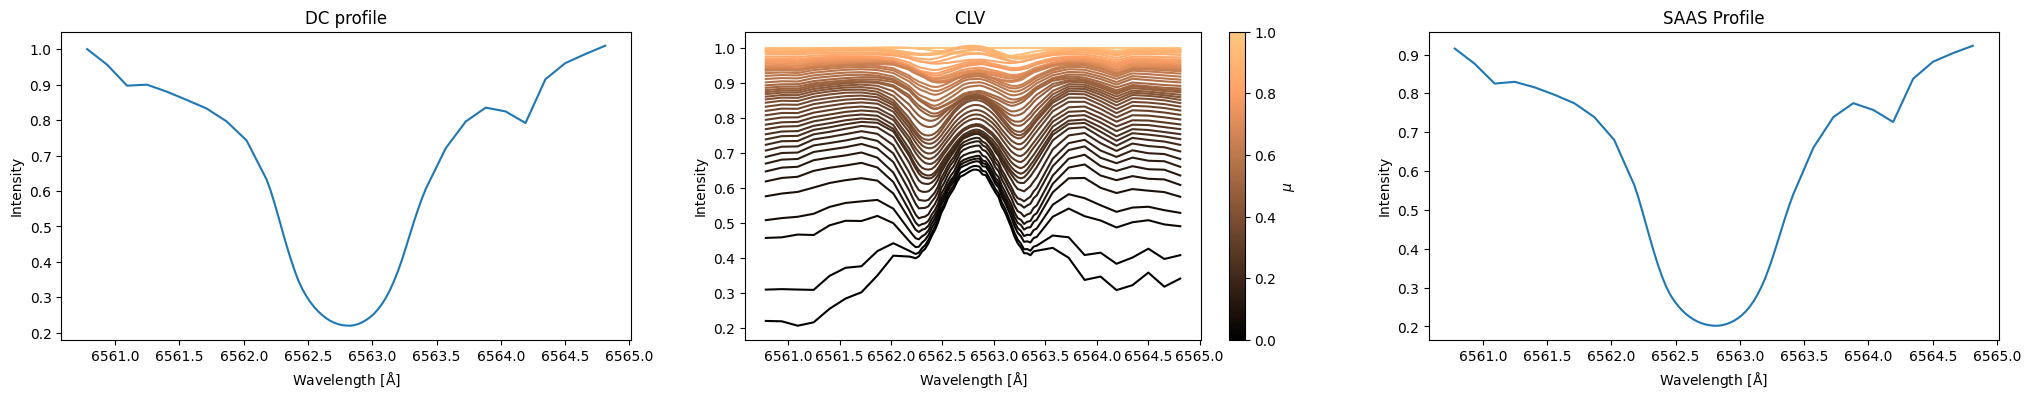

6562.797056366136 6562.797056366135


In [9]:
import use_nessi3  as un3
theor_Ha = un3.linestudier('6563_clv.fits', nr=101)
print(np.median(theor_Ha.sst_wav), np.mean(theor_Ha.sst_wav))

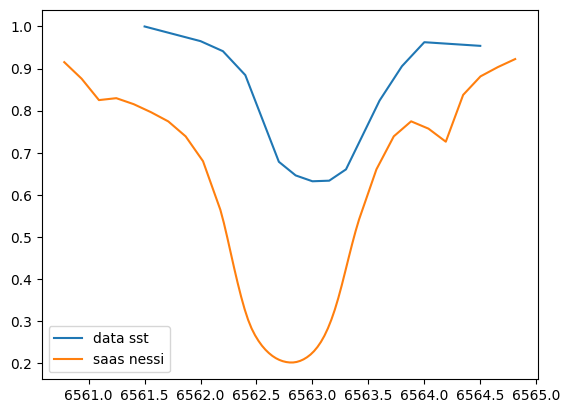

In [10]:
plt.plot(Ha._wavel, Ha.av_spect/Ha.av_spect[0], label='data sst')
plt.plot(theor_Ha.sst_wav, theor_Ha.saas_profile, label="saas nessi")
plt.legend()

# Finding $\mu$

The frame is centered at (520.837576386034, -213.21240933060704)
[482.771976386034, 558.903176386034, -248.70280933060704, -177.72200933060705]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.8116892503744753 for timeframe 0
The frame is centered at (542.2961460260799, -208.40256506899792)
[504.2305460260799, 580.3617460260799, -243.8929650689979, -172.91216506899792]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.7977502733631752 for timeframe 200
We take average mu to be  0.8032968438870519


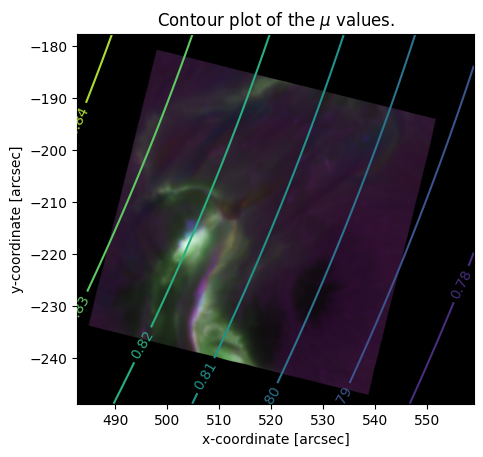

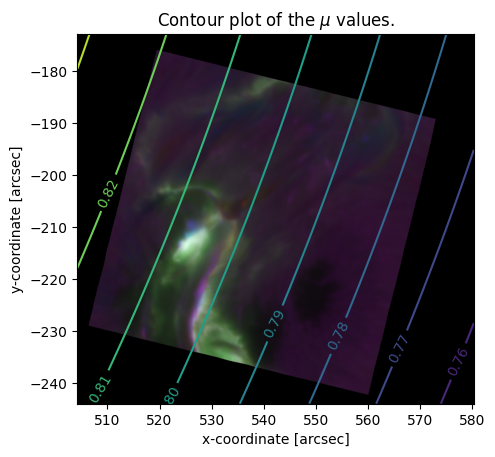

In [11]:
reload(un)
un.give_mu_contourplot('fits/nb_6563_2017-09-06T09_04_20_09_04_20=0-200_mixed_corrected_im.fits', over=Ha)
un.give_mu_contourplot('fits/nb_6563_2017-09-06T09_04_20_09_04_20=0-200_mixed_corrected_im.fits', over=Ha, timeFrame=200)
mu = (0.8103055960914449 + 0.7962880916826589) / 2
print('We take average mu to be ', mu)

In [12]:
xy = un.get_coord_creator('fits/nb_6563_2017-09-06T09_04_20_09_04_20=0-200_mixed_corrected_im.fits')
print(np.shape(Ha.datacube))
xy(1038//2, 1079 //2)

(201, 1, 13, 1200, 1287)


[513.4729031925608, -216.82059999727372]

The frame is centered at (520.837576386034, -213.21240933060704)
[482.771976386034, 558.903176386034, -248.70280933060704, -177.72200933060705]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.8116892503744753 for timeframe 0
succesfully saved.
The frame is centered at (542.2961460260799, -208.40256506899792)
[504.2305460260799, 580.3617460260799, -243.8929650689979, -172.91216506899792]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.7977502733631752 for timeframe 200
We take average mu to be  0.8047197618688252
Mu also set to the theoretic nessi line.


0.8047197618688252

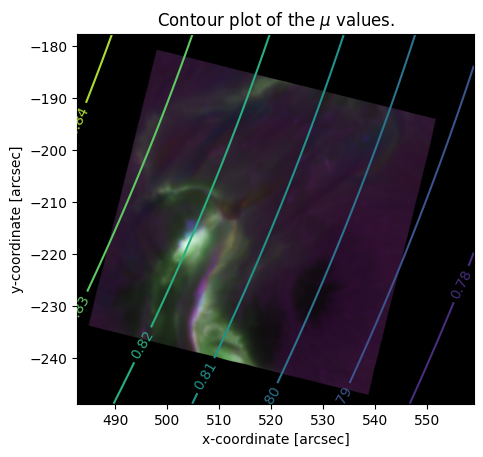

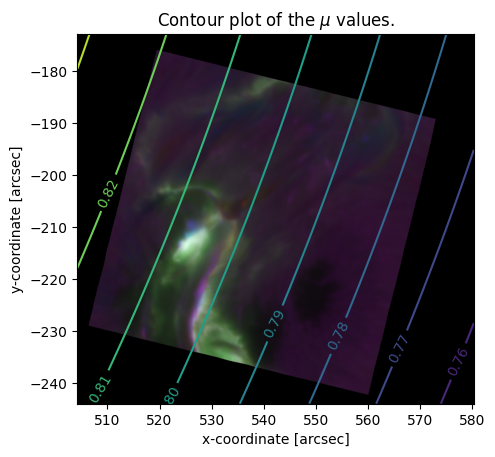

In [13]:
Ha.set_mu(theor_line=theor_Ha, number_of_last_frame=200, alternative_filename='fits/nb_6563_2017-09-06T09_04_20_09_04_20=0-200_mixed_corrected_im.fits')


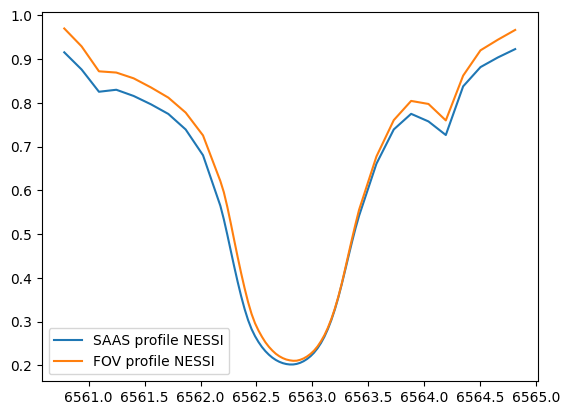

In [14]:
theor_Ha.set_fov( Ha.xx, Ha.yy, Ha.boundary, sr=959.63)

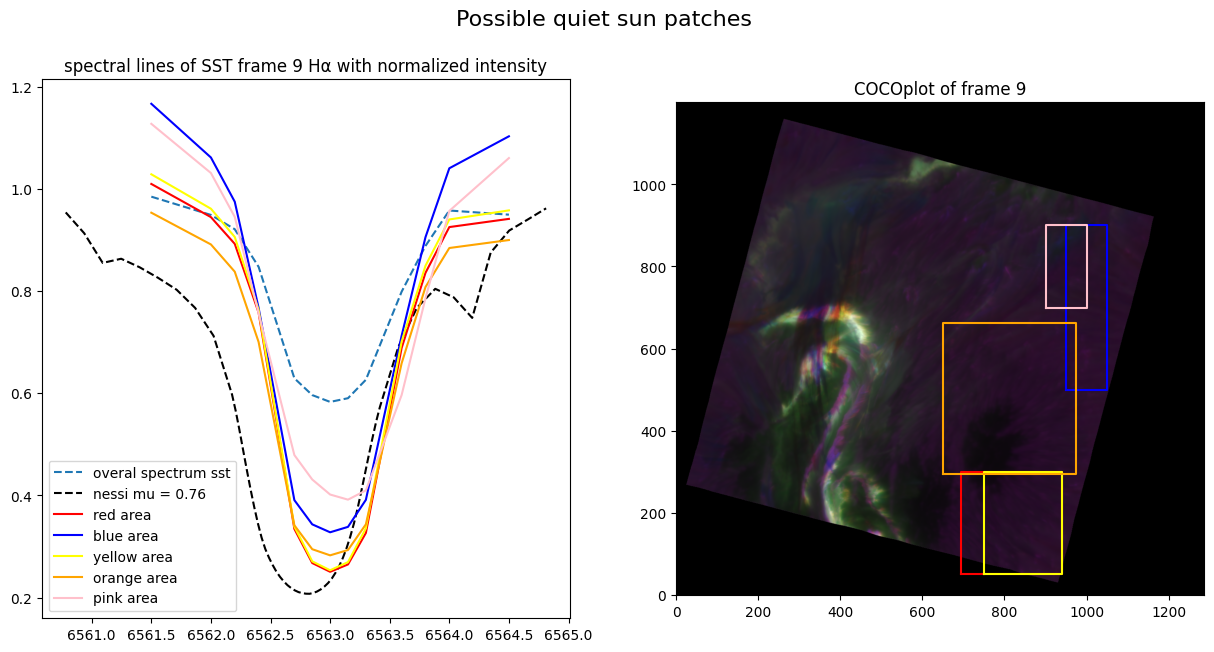

In [15]:
# %matplotlib widget
# %matplotlib inline
frame = 9
X = [ [(694,940), (50,300)],  [(950, 1050), (500, 900)], [(750,940), (50,300)], [(650,975), (294,662)],  [(900, 1000), (700, 900)]]
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']

Ha.possible_quiet_sun_patches(frame, theor_line = theor_Ha, X=X)

### The quiet sun patch 

In [16]:
color_wanted_patch = 'blue'

the edges of the patch are denoted by the xlim: (950, 1050) and ylim: (500, 900)


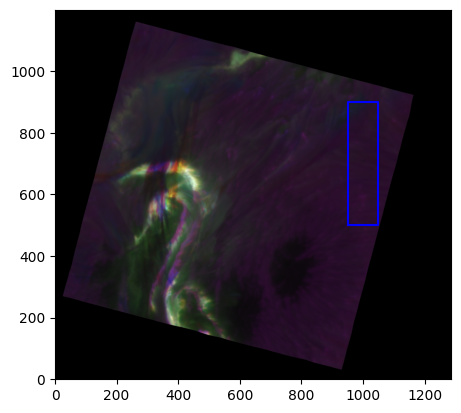

The quiet sun is pick at x (563.4009460260799, -202.4825650689979) with average              mu 0.7815303268675756


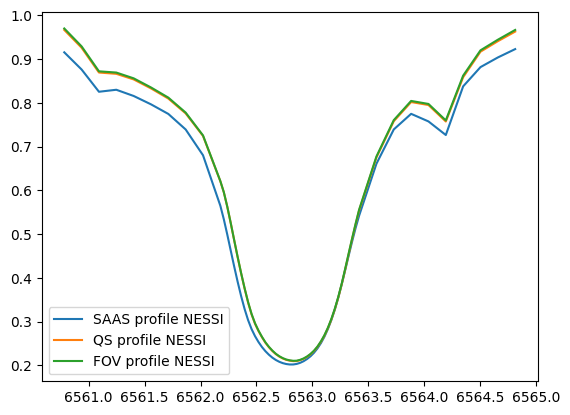

{'frame': 9, 'xlim': (950, 1050), 'ylim': (500, 900), 'color': 'blue'}

In [17]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Ha.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)

theor_Ha.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
Ha.quiet_sun

[6561.49999988 6562.         6562.19999999 6562.39999998 6562.69999999
 6562.84999999 6563.         6563.15000001 6563.30000001 6563.60000002
 6563.80000001 6564.         6564.50000012] [1.16643715 1.06129301 0.97469133 0.76698637 0.39063716 0.34321886
 0.32767311 0.33830178 0.39122298 0.71235955 0.90526259 1.04018867
 1.10276532] [0.84034247 0.73153497 0.60193    0.36917557 0.22060965 0.20966695
 0.22922926 0.29232532 0.42724566 0.69001642 0.77844334 0.79645807
 0.91595764]
[0.20294363 1.50053217]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 16936973624.301102
        x: [ 1.844e-01  1.347e+00]
      nit: 11
      jac: [ 1.152e+03  1.536e+03]
 hess_inv: [[ 1.090e-13  1.948e-14]
            [ 1.948e-14  1.414e-13]]
     nfev: 131
     njev: 41


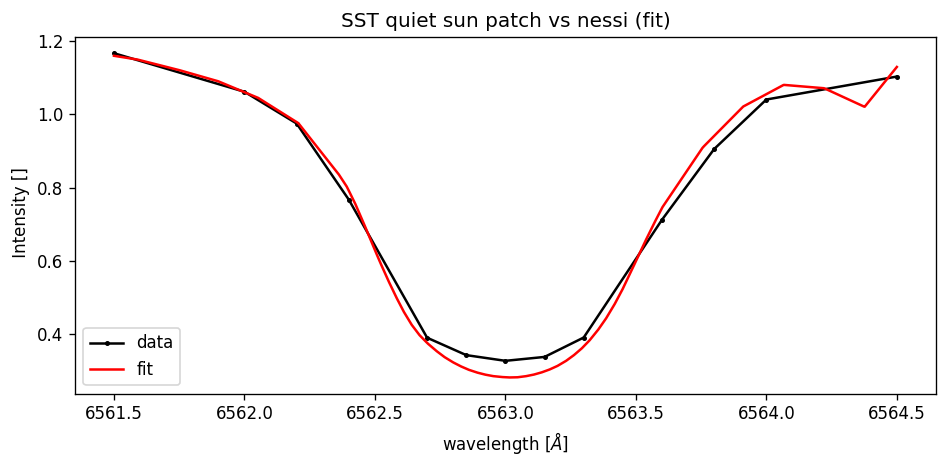

de p-waarde is  0.0 
Chi^2 reduced= 1539724874.9364638 
aantal vrijheidgraden= 11 
chi^2= 16936973624.301102
we behouden de fit tot op een betrouwbaarheidsniveau van  0.0 
Oftewel verwerp als p-waarde <lpha-niveau 


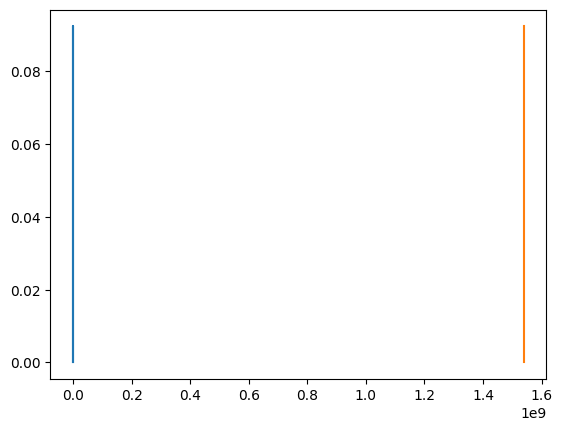

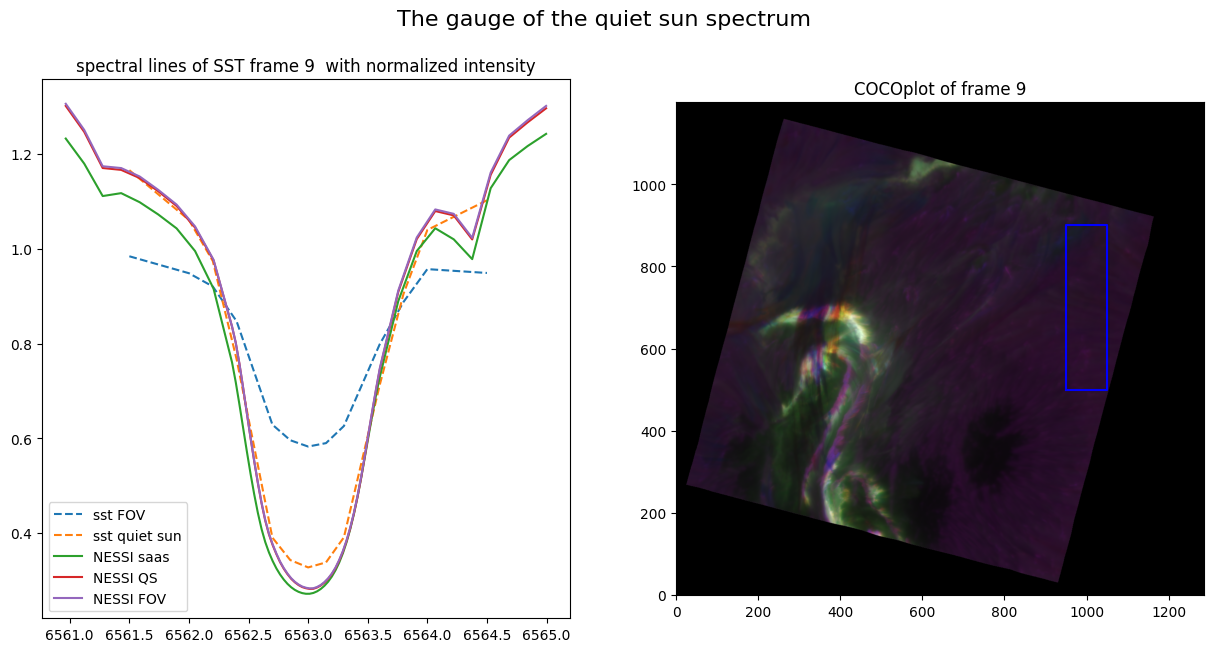

In [18]:
reload(un3)
un3.fit_qs_to_NESSI(theor_Ha, Ha)

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [20] at time t=['09:09:22 UT.
The areafactor for THis flare is 0.0010443088142236788 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 83.92%.


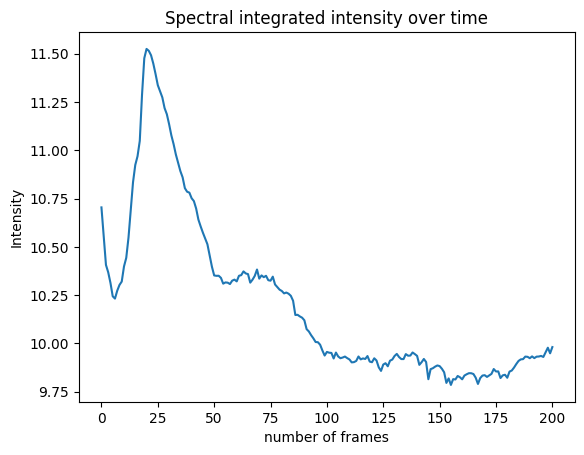

In [19]:
un.save_for_further_analysis(Ha, theor_Ha)
